In [1]:
## numpy의  svd 모듈 import
import numpy as np
from numpy.linalg import svd

# 4*4 random 행렬 a 생성
np.random.seed(121)
a = np.random.rand(4,4)
print(np.round(a,3))

[[0.111 0.211 0.233 0.152]
 [0.83  0.408 0.556 0.746]
 [0.248 0.969 0.953 0.49 ]
 [0.018 0.858 0.405 0.622]]


In [4]:
U,Sigma,Vt = svd(a)
print(U.shape,Sigma.shape,Vt.shape)
print("U matrix: \n",np.round(U,3))
print("Sigma value: \n",np.round(Sigma,3))
print("V transpose: \n",np.round(Vt,3))

(4, 4) (4,) (4, 4)
U matrix: 
 [[-0.169  0.001 -0.128 -0.977]
 [-0.541 -0.828  0.126  0.076]
 [-0.662  0.355 -0.63   0.197]
 [-0.491  0.434  0.756 -0.014]]
Sigma value: 
 [2.153 0.725 0.356 0.007]
V transpose: 
 [[-0.298 -0.612 -0.543 -0.492]
 [-0.815  0.522  0.075 -0.239]
 [-0.148  0.174 -0.714  0.662]
 [ 0.474  0.568 -0.436 -0.513]]


In [6]:
# Sima를 다시 0을 보함한 대칭행렬로 변환
Sigma_mat = np.diag(Sigma)
a_ = U@Sigma_mat@Vt
print(np.round(a_,3))

[[0.111 0.211 0.233 0.152]
 [0.83  0.408 0.556 0.746]
 [0.248 0.969 0.953 0.49 ]
 [0.018 0.858 0.405 0.622]]


In [8]:
# 데이터 의존도가 높은 원본 데이터 생성
a[2] = a[0] + a[1]
a[3] = a[0]
print(np.round(a,3))

[[0.111 0.211 0.233 0.152]
 [0.83  0.408 0.556 0.746]
 [0.942 0.619 0.789 0.897]
 [0.111 0.211 0.233 0.152]]


In [9]:
# 다시 svd를 수행하여 sigma 값 확인

U,Sigma,Vt = svd(a)
print(U.shape,Sigma.shape,Vt.shape)
print("U matrix: \n",np.round(U,3))
print("Sigma value: \n",np.round(Sigma,3))
print("V transpose: \n",np.round(Vt,3))

(4, 4) (4,) (4, 4)
U matrix: 
 [[-0.156  0.613  0.771 -0.071]
 [-0.607 -0.481  0.31   0.551]
 [-0.763  0.132 -0.31  -0.551]
 [-0.156  0.613 -0.461  0.622]]
Sigma value: 
 [2.151 0.24  0.    0.   ]
V transpose: 
 [[-0.585 -0.365 -0.471 -0.551]
 [-0.575  0.599  0.51  -0.223]
 [-0.31  -0.691  0.587  0.286]
 [-0.481  0.173 -0.417  0.752]]


In [13]:
# U 행렬의 경우 Sigma와 내적을 수행하는 sigma의 앞 2행에 대응하는 앞 2열만 추출
U_ = U[:,:2]
Sigma_ = np.diag(Sigma[:2])
# V 전치 행렬의 경우는 앞 2행만 추출
Vt_ = Vt[:2]

print(U_.shape,Sigma_.shape,Vt_.shape)
a_ = U_ @ Sigma_@ Vt_
print(np.round(a_,3))

(4, 2) (2, 2) (2, 4)
[[0.111 0.211 0.233 0.152]
 [0.83  0.408 0.556 0.746]
 [0.942 0.619 0.789 0.897]
 [0.111 0.211 0.233 0.152]]


In [22]:
## Truncated SVD 를 이용한 행렬 분해
import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svd

# 원본 행렬을 출력하고 svd를 적용할 경우 u sigma,vt의 차원 확인
np.random.seed(121)
matrix = np.random.random((6,6))
print("원본 행렬: \n",matrix)

U,Sigma,Vt = svd(matrix,full_matrices=False)
print(U.shape,Sigma.shape,Vt.shape)
print('\n sigma값 행렬:',Sigma)


#Truncated svd 로 sigma 행렬의 특이값을 4개로 하여 truncated svd 수행
num_components = 4

U_tr,Sigma_tr,Vt_tr = svds(matrix,k=num_components)
print(U_tr.shape,Sigma_tr.shape,Vt_tr.shape)
print('\n truncated svd sigma값 행렬:',Sigma_tr)
matrix_tr = U_tr@np.diag(Sigma_tr)@Vt_tr
print('\n Truncated SVD 로 분해후 복원 행렬:\n', matrix_tr)

원본 행렬: 
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]
(6, 6) (6,) (6, 6)

 sigma값 행렬: [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]
(6, 4) (4,) (4, 6)

 truncated svd sigma값 행렬: [0.55463089 0.83865238 0.88116505 3.2535007 ]

 Truncated SVD 로 분해후 복원 행렬:
 [[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.83806144 0.78847467 0.93868685 0.72673231 0.6740867  0.73812389]
 [0.59726

Text(0, 0.5, 'TruncatedSVD component 2')

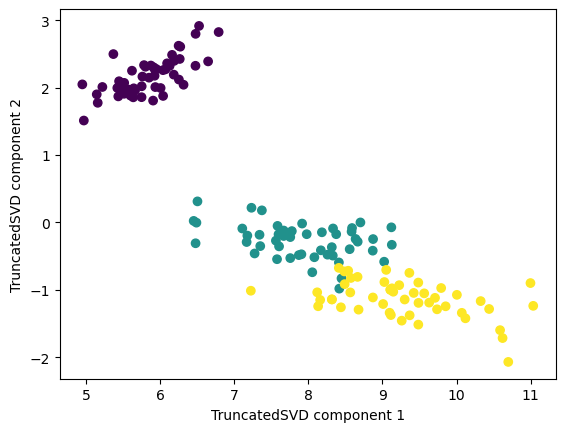

In [25]:
### 사이킷 런 Truncated SVD 클래스 를 이용한 변환
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()
iris_ftrs = iris.data

# 2개의 주요 component로 TruncatedSVD 변환
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

plt.scatter(x=iris_tsvd[:,0],y=iris_tsvd[:,1],c=iris.target)
plt.xlabel('TruncatedSVD component 1')
plt.ylabel('TruncatedSVD component 2')

Text(0.5, 1.0, 'PCA Transformed')

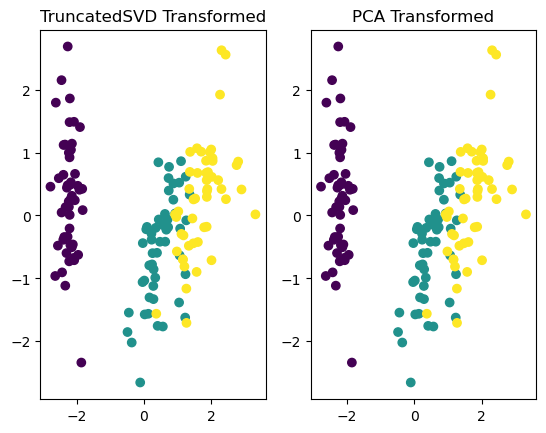

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

##
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

## 
pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

plt.subplot(1,2,1)
plt.scatter(x=iris_tsvd[:,0],y=iris_tsvd[:,1],c=iris.target)
plt.title('TruncatedSVD Transformed')
plt.subplot(1,2,2)
plt.scatter(x=iris_pca[:,0],y=iris_pca[:,1],c=iris.target)
plt.title('PCA Transformed')

In [35]:
tsvd.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [36]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])